## Source

- Energy consumption data obtained from Appendix I: Detailed Energy Balance from page 52 of the 2023 MEMD Statistical Abstract

In [1]:
import numpy as np
import pandas as pd
import os
from utils.utils import *

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
edau = EDAUtils()
gu = GeneralUtils()

In [4]:
# Set up paths
CURRENT_DIR_PATH = os.getcwd()
OUTPUT_DATA_DIR_PATH = os.path.join(CURRENT_DIR_PATH, "output_data")
INPUT_DATA_DIR_PATH = os.path.join(CURRENT_DIR_PATH, "input_data")

In [5]:
# Set industry type
industry_type = "agriculture_and_livestock"

In [6]:
# load final energy consumption by fuel data
consump_by_fuel_df = pd.read_csv(os.path.join(INPUT_DATA_DIR_PATH, "inen","final_energy_consumption_by_fuel_uganda_2023.csv"))
consump_by_fuel_df.head()

,Sector,LPG,Gasoline,Jet Kerosene,Other Kerosene,Gas/Diesel Oil,Fuel oil,Wood fuel,Bagasse,Rice husks,Other vegetal waste,Animal waste,Biomass briquettes,Charcoal,Biogas,Hydro,Solar PV,Electricity,Total
0,Iron and steel,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,193,193
1,Chemical (including petrochemical),0,0,0,32,0,0,0,0,0,0,0,0,0,0,0,0,0,32
2,Non-metallic minerals,0,0,0,0,0,0,545,0,0,0,0,0,0,0,0,0,0,545
3,Machinery,0,97,0,0,297,0,0,0,0,0,0,0,0,0,0,0,0,394
4,"Food, beverages and tobacco",0,0,0,0,0,0,293,0,0,0,0,0,392,0,0,0,52,737


In [7]:
# Aggregate some fields
consump_by_fuel_df["Kerosene"] = consump_by_fuel_df["Jet Kerosene"] + consump_by_fuel_df["Other Kerosene"]
consump_by_fuel_df["Solid biomass"] = consump_by_fuel_df["Wood fuel"] + consump_by_fuel_df["Bagasse"] + consump_by_fuel_df["Rice husks"] + consump_by_fuel_df["Other vegetal waste"] +  consump_by_fuel_df["Animal waste"] + consump_by_fuel_df["Biomass briquettes"] + consump_by_fuel_df["Charcoal"]
consump_by_fuel_df["Electricity_and_hydro"] = consump_by_fuel_df["Electricity"] + consump_by_fuel_df["Hydro"]
consump_by_fuel_df["Diesel"] = consump_by_fuel_df["Gas/Diesel Oil"] * 0.90
consump_by_fuel_df["Furnace gas"] = consump_by_fuel_df["Gas/Diesel Oil"] * 0.10
consump_by_fuel_df["Natural gas"] = consump_by_fuel_df["Gas/Diesel Oil"] * 0.00
consump_by_fuel_df.head()

,Sector,LPG,Gasoline,Jet Kerosene,Other Kerosene,Gas/Diesel Oil,Fuel oil,Wood fuel,Bagasse,Rice husks,...,Hydro,Solar PV,Electricity,Total,Kerosene,Solid biomass,Electricity_and_hydro,Diesel,Furnace gas,Natural gas
0,Iron and steel,0,0,0,0,0,0,0,0,0,...,0,0,193,193,0,0,193,0.0,0.0,0.0
1,Chemical (including petrochemical),0,0,0,32,0,0,0,0,0,...,0,0,0,32,32,0,0,0.0,0.0,0.0
2,Non-metallic minerals,0,0,0,0,0,0,545,0,0,...,0,0,0,545,0,545,0,0.0,0.0,0.0
3,Machinery,0,97,0,0,297,0,0,0,0,...,0,0,0,394,0,0,0,267.3,29.7,0.0
4,"Food, beverages and tobacco",0,0,0,0,0,0,293,0,0,...,0,0,52,737,0,685,52,0.0,0.0,0.0


In [8]:
consump_by_fuel_df["Sector"]

0                            Iron and steel
1        Chemical (including petrochemical)
2                     Non-metallic minerals
3                                 Machinery
4               Food, beverages and tobacco
5                                      Road
6                                      Rail
7                       Domestic navigation
8                         Domestic aviation
9                                Households
10           Commercial and Public Services
11        Agriculture, Forestry and Fishing
12    Non-specified (HH, Com. & PS., Agri.)
13                           Non-energy use
14                         Industry - Total
15                        Transport - Total
16                        Final consumption
Name: Sector, dtype: object

In [9]:
sector_type = "Agriculture, Forestry and Fishing"
base_year = 2023

In [10]:
# Filter consumption data for the specific sector
consump_by_fuel_df_filtered = consump_by_fuel_df[consump_by_fuel_df["Sector"] == sector_type]
consump_by_fuel_df_filtered

,Sector,LPG,Gasoline,Jet Kerosene,Other Kerosene,Gas/Diesel Oil,Fuel oil,Wood fuel,Bagasse,Rice husks,...,Hydro,Solar PV,Electricity,Total,Kerosene,Solid biomass,Electricity_and_hydro,Diesel,Furnace gas,Natural gas
11,"Agriculture, Forestry and Fishing",0,97,0,0,99,0,0,0,0,...,0,0,0,196,0,0,0,89.1,9.9,0.0


In [11]:
fuel_mapping = {
    f'frac_inen_energy_{industry_type}_coal': 0, 
    f'frac_inen_energy_{industry_type}_coke': 0,
    f'frac_inen_energy_{industry_type}_diesel': consump_by_fuel_df_filtered["Diesel"].values[0],
    f'frac_inen_energy_{industry_type}_hydrogen': 0,
    f'frac_inen_energy_{industry_type}_gasoline': consump_by_fuel_df_filtered["Gasoline"].values[0],
    f'frac_inen_energy_{industry_type}_hydrocarbon_gas_liquids': consump_by_fuel_df_filtered["LPG"].values[0],
    f'frac_inen_energy_{industry_type}_solid_biomass': consump_by_fuel_df_filtered["Solid biomass"].values[0],
    f'frac_inen_energy_{industry_type}_oil': consump_by_fuel_df_filtered["Fuel oil"].values[0],
    f'frac_inen_energy_{industry_type}_natural_gas': consump_by_fuel_df_filtered["Natural gas"].values[0],
    f'frac_inen_energy_{industry_type}_furnace_gas': consump_by_fuel_df_filtered["Furnace gas"].values[0],
    f'frac_inen_energy_{industry_type}_kerosene': consump_by_fuel_df_filtered["Kerosene"].values[0],
    f'frac_inen_energy_{industry_type}_electricity': consump_by_fuel_df_filtered["Electricity_and_hydro"].values[0],
    f'frac_inen_energy_{industry_type}_solar': consump_by_fuel_df_filtered["Solar PV"].values[0],
}

fuel_mapping


{'frac_inen_energy_agriculture_and_livestock_coal': 0,
 'frac_inen_energy_agriculture_and_livestock_coke': 0,
 'frac_inen_energy_agriculture_and_livestock_diesel': np.float64(89.10000000000001),
 'frac_inen_energy_agriculture_and_livestock_hydrogen': 0,
 'frac_inen_energy_agriculture_and_livestock_gasoline': np.int64(97),
 'frac_inen_energy_agriculture_and_livestock_hydrocarbon_gas_liquids': np.int64(0),
 'frac_inen_energy_agriculture_and_livestock_solid_biomass': np.int64(0),
 'frac_inen_energy_agriculture_and_livestock_oil': np.int64(0),
 'frac_inen_energy_agriculture_and_livestock_natural_gas': np.float64(0.0),
 'frac_inen_energy_agriculture_and_livestock_furnace_gas': np.float64(9.9),
 'frac_inen_energy_agriculture_and_livestock_kerosene': np.int64(0),
 'frac_inen_energy_agriculture_and_livestock_electricity': np.int64(0),
 'frac_inen_energy_agriculture_and_livestock_solar': np.int64(0)}

In [12]:
# Create df from the mapping
frac_inen_energy_df = pd.DataFrame(fuel_mapping, index=[0])
frac_inen_energy_df

,frac_inen_energy_agriculture_and_livestock_coal,frac_inen_energy_agriculture_and_livestock_coke,frac_inen_energy_agriculture_and_livestock_diesel,frac_inen_energy_agriculture_and_livestock_hydrogen,frac_inen_energy_agriculture_and_livestock_gasoline,frac_inen_energy_agriculture_and_livestock_hydrocarbon_gas_liquids,frac_inen_energy_agriculture_and_livestock_solid_biomass,frac_inen_energy_agriculture_and_livestock_oil,frac_inen_energy_agriculture_and_livestock_natural_gas,frac_inen_energy_agriculture_and_livestock_furnace_gas,frac_inen_energy_agriculture_and_livestock_kerosene,frac_inen_energy_agriculture_and_livestock_electricity,frac_inen_energy_agriculture_and_livestock_solar
0,0,0,89.1,0,97,0,0,0,0.0,9.9,0,0,0


In [13]:
# normalize the df
frac_inen_energy_df = frac_inen_energy_df.div(frac_inen_energy_df.sum(axis=1), axis=0)
frac_inen_energy_df

,frac_inen_energy_agriculture_and_livestock_coal,frac_inen_energy_agriculture_and_livestock_coke,frac_inen_energy_agriculture_and_livestock_diesel,frac_inen_energy_agriculture_and_livestock_hydrogen,frac_inen_energy_agriculture_and_livestock_gasoline,frac_inen_energy_agriculture_and_livestock_hydrocarbon_gas_liquids,frac_inen_energy_agriculture_and_livestock_solid_biomass,frac_inen_energy_agriculture_and_livestock_oil,frac_inen_energy_agriculture_and_livestock_natural_gas,frac_inen_energy_agriculture_and_livestock_furnace_gas,frac_inen_energy_agriculture_and_livestock_kerosene,frac_inen_energy_agriculture_and_livestock_electricity,frac_inen_energy_agriculture_and_livestock_solar
0,0.0,0.0,0.454592,0.0,0.494898,0.0,0.0,0.0,0.0,0.05051,0.0,0.0,0.0


In [14]:
# Add the base year to the df
frac_inen_energy_df["year"] = base_year

# Set the year field to be at the beginning of the df
frac_inen_energy_df = frac_inen_energy_df[["year"] + [col for col in frac_inen_energy_df.columns if col != "year"]]
frac_inen_energy_df

,year,frac_inen_energy_agriculture_and_livestock_coal,frac_inen_energy_agriculture_and_livestock_coke,frac_inen_energy_agriculture_and_livestock_diesel,frac_inen_energy_agriculture_and_livestock_hydrogen,frac_inen_energy_agriculture_and_livestock_gasoline,frac_inen_energy_agriculture_and_livestock_hydrocarbon_gas_liquids,frac_inen_energy_agriculture_and_livestock_solid_biomass,frac_inen_energy_agriculture_and_livestock_oil,frac_inen_energy_agriculture_and_livestock_natural_gas,frac_inen_energy_agriculture_and_livestock_furnace_gas,frac_inen_energy_agriculture_and_livestock_kerosene,frac_inen_energy_agriculture_and_livestock_electricity,frac_inen_energy_agriculture_and_livestock_solar
0,2023,0.0,0.0,0.454592,0.0,0.494898,0.0,0.0,0.0,0.0,0.05051,0.0,0.0,0.0


In [15]:
# project backward
frac_inen_energy_df = gu.extend_years_backward(frac_inen_energy_df, "year", 2023, np.arange(2015, 2023).tolist())
frac_inen_energy_df

,year,frac_inen_energy_agriculture_and_livestock_coal,frac_inen_energy_agriculture_and_livestock_coke,frac_inen_energy_agriculture_and_livestock_diesel,frac_inen_energy_agriculture_and_livestock_hydrogen,frac_inen_energy_agriculture_and_livestock_gasoline,frac_inen_energy_agriculture_and_livestock_hydrocarbon_gas_liquids,frac_inen_energy_agriculture_and_livestock_solid_biomass,frac_inen_energy_agriculture_and_livestock_oil,frac_inen_energy_agriculture_and_livestock_natural_gas,frac_inen_energy_agriculture_and_livestock_furnace_gas,frac_inen_energy_agriculture_and_livestock_kerosene,frac_inen_energy_agriculture_and_livestock_electricity,frac_inen_energy_agriculture_and_livestock_solar
0,2015,0.0,0.0,0.454592,0.0,0.494898,0.0,0.0,0.0,0.0,0.05051,0.0,0.0,0.0
1,2016,0.0,0.0,0.454592,0.0,0.494898,0.0,0.0,0.0,0.0,0.05051,0.0,0.0,0.0
2,2017,0.0,0.0,0.454592,0.0,0.494898,0.0,0.0,0.0,0.0,0.05051,0.0,0.0,0.0
3,2018,0.0,0.0,0.454592,0.0,0.494898,0.0,0.0,0.0,0.0,0.05051,0.0,0.0,0.0
4,2019,0.0,0.0,0.454592,0.0,0.494898,0.0,0.0,0.0,0.0,0.05051,0.0,0.0,0.0
5,2020,0.0,0.0,0.454592,0.0,0.494898,0.0,0.0,0.0,0.0,0.05051,0.0,0.0,0.0
6,2021,0.0,0.0,0.454592,0.0,0.494898,0.0,0.0,0.0,0.0,0.05051,0.0,0.0,0.0
7,2022,0.0,0.0,0.454592,0.0,0.494898,0.0,0.0,0.0,0.0,0.05051,0.0,0.0,0.0
8,2023,0.0,0.0,0.454592,0.0,0.494898,0.0,0.0,0.0,0.0,0.05051,0.0,0.0,0.0


In [16]:
# project forward
frac_inen_energy_df_extended = gu.extend_projection(frac_inen_energy_df, base_year, 2100)
frac_inen_energy_df_extended

,year,frac_inen_energy_agriculture_and_livestock_coal,frac_inen_energy_agriculture_and_livestock_coke,frac_inen_energy_agriculture_and_livestock_diesel,frac_inen_energy_agriculture_and_livestock_hydrogen,frac_inen_energy_agriculture_and_livestock_gasoline,frac_inen_energy_agriculture_and_livestock_hydrocarbon_gas_liquids,frac_inen_energy_agriculture_and_livestock_solid_biomass,frac_inen_energy_agriculture_and_livestock_oil,frac_inen_energy_agriculture_and_livestock_natural_gas,frac_inen_energy_agriculture_and_livestock_furnace_gas,frac_inen_energy_agriculture_and_livestock_kerosene,frac_inen_energy_agriculture_and_livestock_electricity,frac_inen_energy_agriculture_and_livestock_solar
0,2015,0.0,0.0,0.454592,0.0,0.494898,0.0,0.0,0.0,0.0,0.05051,0.0,0.0,0.0
1,2016,0.0,0.0,0.454592,0.0,0.494898,0.0,0.0,0.0,0.0,0.05051,0.0,0.0,0.0
2,2017,0.0,0.0,0.454592,0.0,0.494898,0.0,0.0,0.0,0.0,0.05051,0.0,0.0,0.0
3,2018,0.0,0.0,0.454592,0.0,0.494898,0.0,0.0,0.0,0.0,0.05051,0.0,0.0,0.0
4,2019,0.0,0.0,0.454592,0.0,0.494898,0.0,0.0,0.0,0.0,0.05051,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82,2096,0.0,0.0,0.454592,0.0,0.494898,0.0,0.0,0.0,0.0,0.05051,0.0,0.0,0.0
83,2097,0.0,0.0,0.454592,0.0,0.494898,0.0,0.0,0.0,0.0,0.05051,0.0,0.0,0.0
84,2098,0.0,0.0,0.454592,0.0,0.494898,0.0,0.0,0.0,0.0,0.05051,0.0,0.0,0.0
85,2099,0.0,0.0,0.454592,0.0,0.494898,0.0,0.0,0.0,0.0,0.05051,0.0,0.0,0.0


## Validation

In [17]:
# load global data
uga_global_df = pd.read_csv(os.path.join(INPUT_DATA_DIR_PATH, "sisepuede_raw_global_inputs_uganda.csv"))
uga_global_df.head()

,frac_agrc_nuts_cl1_temperate,yf_agrc_cereals_tonne_ha,frac_agrc_rice_cl2_wet,frac_agrc_cereals_cl1_tropical,frac_agrc_tubers_cl1_tropical,pop_lvst_initial_chickens,frac_agrc_bevs_and_spices_cl2_wet,frac_agrc_tubers_cl2_wet,frac_frst_primary_cl1_temperate_nutrient_rich,frac_lndu_grasslands_cl2_dry,...,nemomod_entc_frac_min_share_production_pp_biogas,nemomod_entc_frac_min_share_production_pp_coal,nemomod_entc_frac_min_share_production_pp_coal_ccs,nemomod_entc_frac_min_share_production_pp_gas,nemomod_entc_frac_min_share_production_pp_gas_ccs,nemomod_entc_frac_min_share_production_pp_geothermal,nemomod_entc_frac_min_share_production_pp_nuclear,nemomod_entc_frac_min_share_production_pp_ocean,nemomod_entc_frac_min_share_production_pp_waste_incineration,nemomod_entc_frac_min_share_production_pp_wind
0,0.030468,1.805033,0.988021,0.969532,0.969532,46039000,0.988021,0.988021,0.015234,0.011979,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.030468,1.832342,0.988021,0.969532,0.969532,46291000,0.988021,0.988021,0.015234,0.011979,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.030468,1.827437,0.988021,0.969532,0.969532,47578000,0.988021,0.988021,0.015234,0.011979,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.030468,1.935353,0.988021,0.969532,0.969532,48901000,0.988021,0.988021,0.015234,0.011979,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.030468,2.003586,0.988021,0.969532,0.969532,43121000,0.988021,0.988021,0.015234,0.011979,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [18]:
print(gu.check_row_sums_to_one(frac_inen_energy_df_extended))

(array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True]), np.True_)


Comparing frac_inen_energy_agriculture_and_livestock_coal...


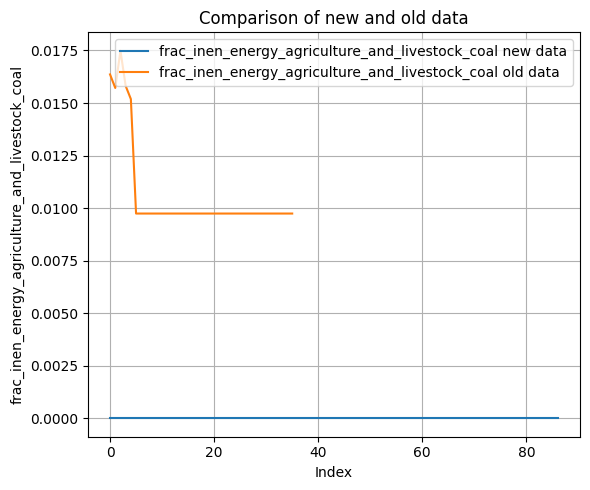

Comparing frac_inen_energy_agriculture_and_livestock_coke...


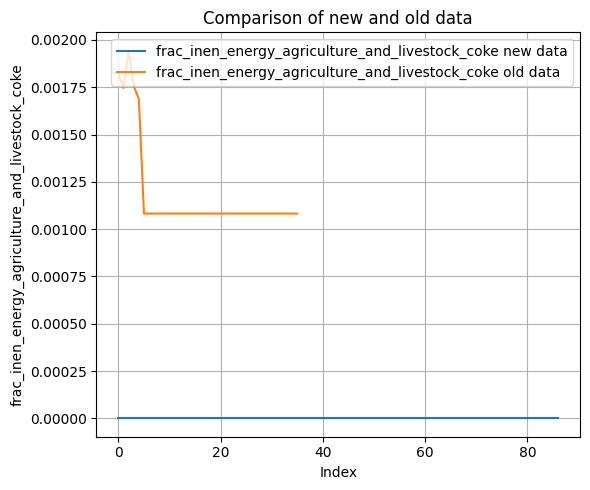

Comparing frac_inen_energy_agriculture_and_livestock_diesel...


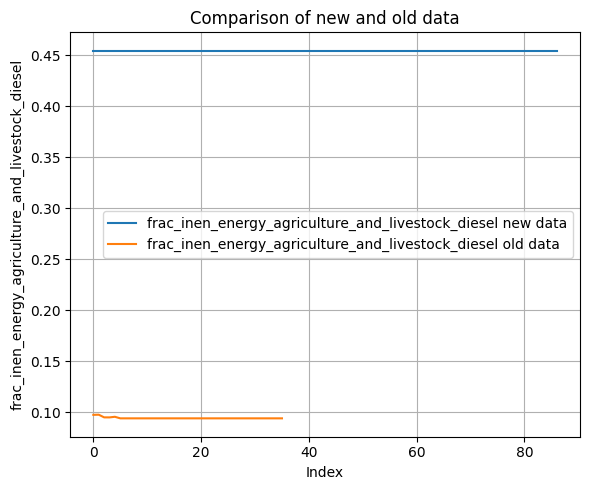

Comparing frac_inen_energy_agriculture_and_livestock_hydrogen...


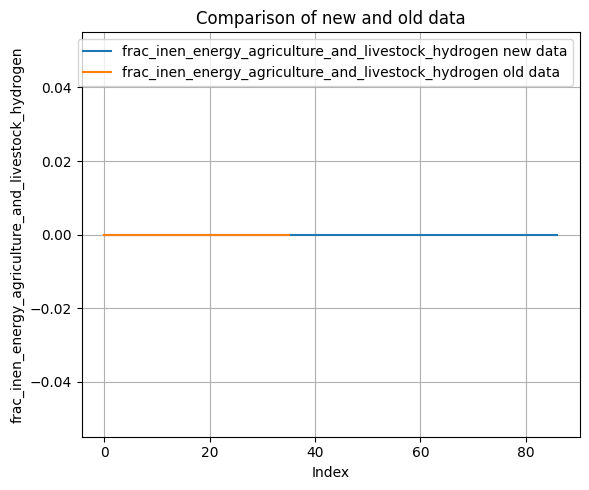

Comparing frac_inen_energy_agriculture_and_livestock_gasoline...


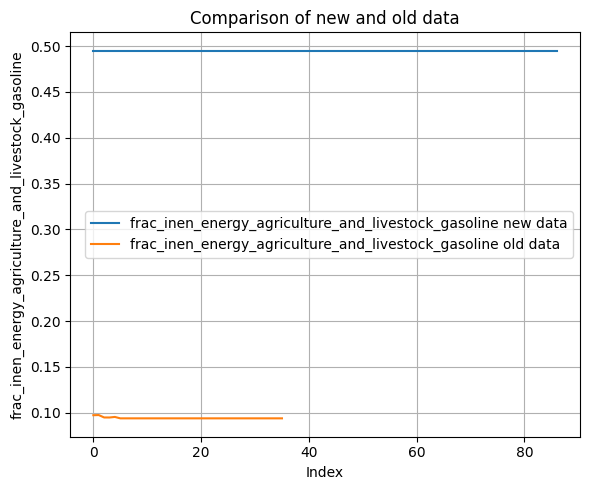

Comparing frac_inen_energy_agriculture_and_livestock_hydrocarbon_gas_liquids...


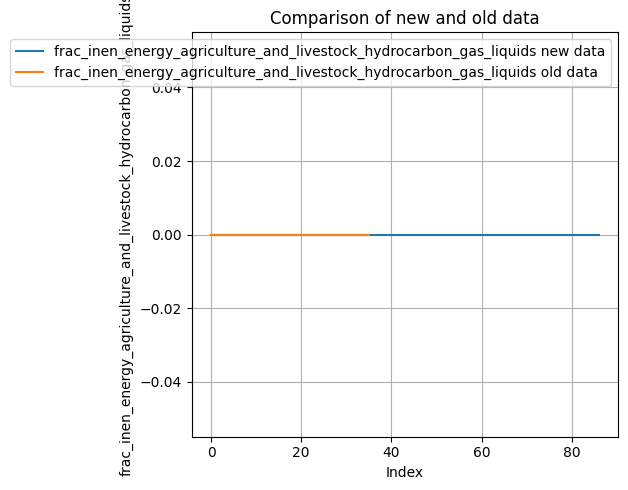

Comparing frac_inen_energy_agriculture_and_livestock_solid_biomass...


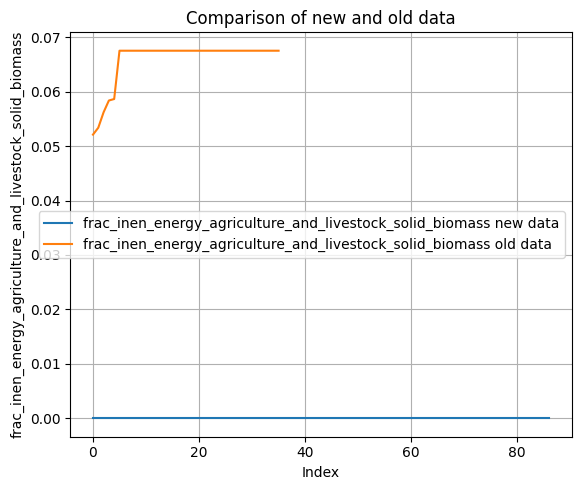

Comparing frac_inen_energy_agriculture_and_livestock_oil...


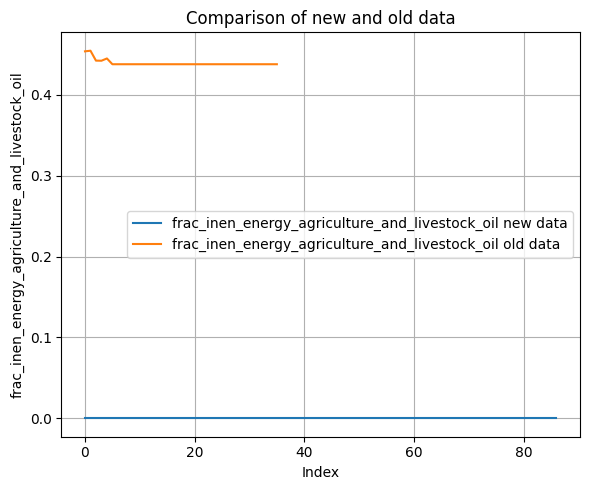

Comparing frac_inen_energy_agriculture_and_livestock_natural_gas...


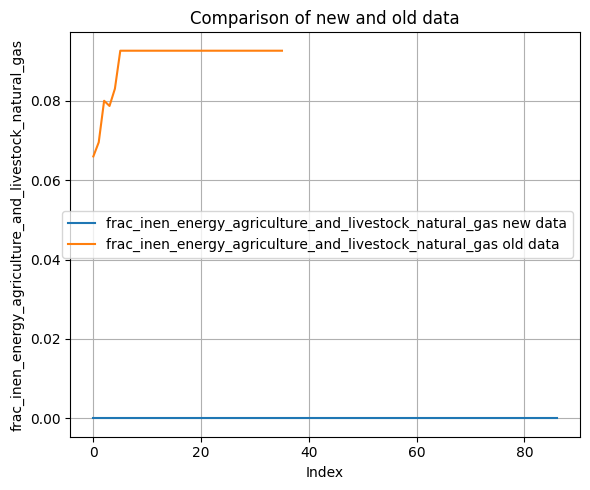

Comparing frac_inen_energy_agriculture_and_livestock_furnace_gas...


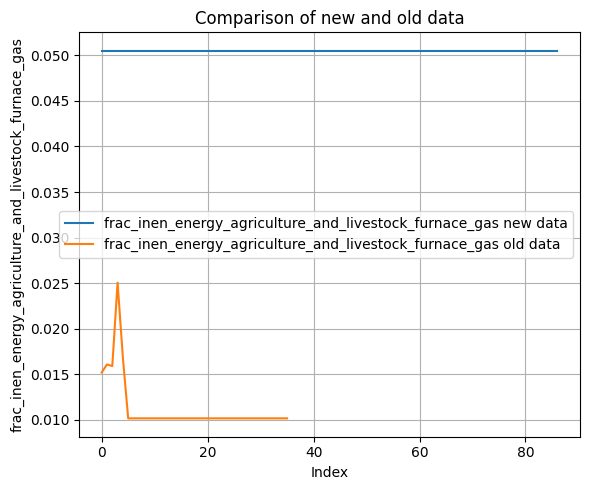

Comparing frac_inen_energy_agriculture_and_livestock_kerosene...


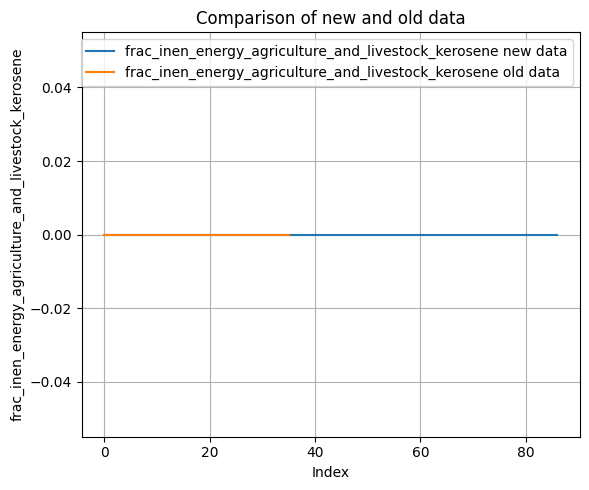

Comparing frac_inen_energy_agriculture_and_livestock_electricity...


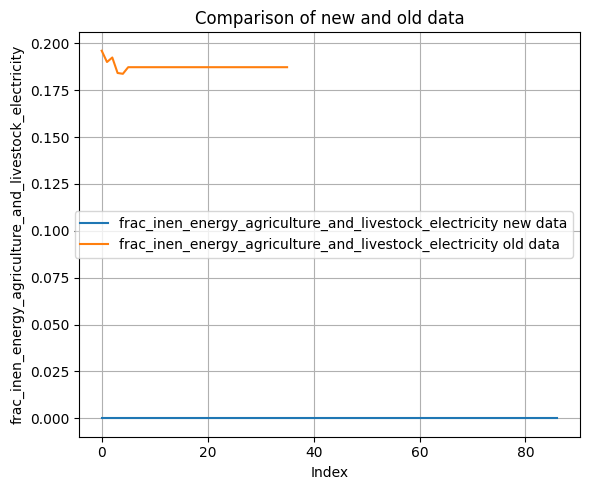

Comparing frac_inen_energy_agriculture_and_livestock_solar...


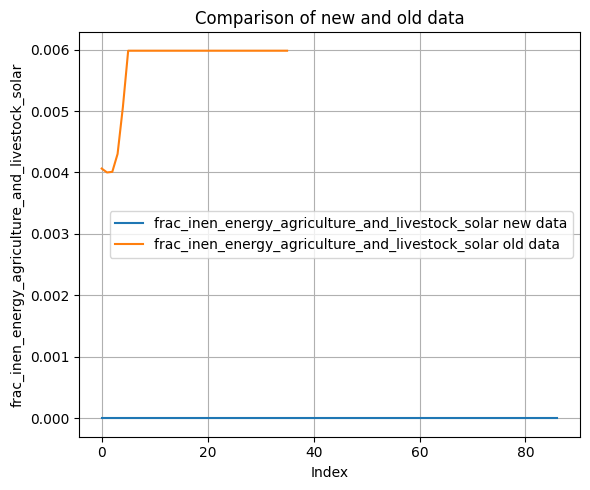

In [19]:
for var in frac_inen_energy_df_extended.columns:
    if var != 'year':
        print(f"Comparing {var}...")
        edau.compare_variables(frac_inen_energy_df_extended, uga_global_df, [var])

In [20]:
frac_inen_energy_df_extended.to_csv(os.path.join(OUTPUT_DATA_DIR_PATH, f"frac_inen_energy_{industry_type}.csv"), index=False)